## Importing necessary packages 

In [1]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
%matplotlib inline

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

## 請創建一個myvector，裡面包含一個缺失值。

In [2]:
myvector = pd.Series([10, 20, np.nan, 30, 40])

## 用describe()看看myvector的資訊。

In [3]:
# It is called describe in pandas 
myvector.describe()

count     4.000000
mean     25.000000
std      12.909944
min      10.000000
25%      17.500000
50%      25.000000
75%      32.500000
max      40.000000
dtype: float64

## 同樣創建一個mycountry，裡面也包含缺失值，並比較NA跟"NA"差異。

In [4]:
mycountry = pd.Series(["Austria", "Australia", np.nan, np.nan, "Germany", "NA"])

## 使用is.null()判別其中那些元素為NA

In [5]:
mycountry.isnull()

0    False
1    False
2     True
3     True
4    False
5    False
dtype: bool

## 同樣可以判斷mycountry中第幾個元素為NA

In [6]:
# Do notice that Python starts counting from 0, and R starts counting from 1
mycountry[mycountry.isnull()].index

Int64Index([2, 3], dtype='int64')

In [7]:
X = [1,4,7,10]
X

[1, 4, 7, 10]

## 請指定x中第4個數值為NA

In [8]:
# The fourth value in Python is 3!!!!
X[3] = np.nan
X

[1, 4, 7, nan]

## 以下為判斷dataframe裡面那些欄位有NA。
## 請試著用which,colSums,is.na來找出資料集airquality中哪幾個欄位含有NA。

In [9]:
airquality = pd.read_csv('./Data/air.csv', index_col = 0)

In [10]:
# In Python we can simply use sum() instead of colSums() in R
airquality.columns[airquality.isnull().sum() > 0]

Index(['Ozone', 'Solar.R'], dtype='object')

In [11]:
# 直接計算出 DataFrame 中每一行(Column) NA 個數
airquality.isnull().sum()

Ozone      37
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
dtype: int64

In [12]:
# describe() is equivaient to summary() in R 
airquality.describe()

,Ozone,Solar.R,Wind,Temp,Month,Day
count,116.000000,146.000000,153.000000,153.000000,153.000000,153.000000
mean,42.129310,185.931507,9.957516,77.882353,6.993464,15.803922
std,32.987885,90.058422,3.523001,9.465270,1.416522,8.864520
min,1.000000,7.000000,1.700000,56.000000,5.000000,1.000000
25%,18.000000,115.750000,7.400000,72.000000,6.000000,8.000000
50%,31.500000,205.000000,9.700000,79.000000,7.000000,16.000000
75%,63.250000,258.750000,11.500000,85.000000,8.000000,23.000000
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000


In [13]:
X = pd.Series([1, 4, np.nan, 10])
X.describe()

count     3.000000
mean      5.000000
std       4.582576
min       1.000000
25%       2.500000
50%       4.000000
75%       7.000000
max      10.000000
dtype: float64

In [14]:
# pandas ignores NA by default 
X.mean()

5.0

In [15]:
X.std()

4.58257569495584

In [16]:
X[~X.isnull()]

0     1.0
1     4.0
3    10.0
dtype: float64

In [17]:
mydata = np.random.choice(np.arange(1, 21), (4, 2))
mydata = mydata.astype(float)
mydata[3,1] = np.nan
mydata

array([[ 9., 16.],
       [ 5.,  2.],
       [ 8., 20.],
       [12., nan]])

In [18]:
mydata = pd.DataFrame(mydata, columns = ['y', 'x'])
mydata

,y,x
0,9.0,16.0
1,5.0,2.0
2,8.0,20.0
3,12.0,NaN


In [19]:
# 用簡單線性回歸配適 y~x
# 方法1: sklearn
from sklearn.linear_model import LinearRegression

mydata = np.random.choice(np.arange(1, 21), (4, 2))
mydata = pd.DataFrame(mydata, columns = ['y', 'x'])
reg = LinearRegression().fit(mydata.x.values.reshape(-1, 1), mydata.y)

In [20]:
reg.intercept_, reg.score(mydata.x.values.reshape(-1, 1), mydata.y)

(15.756660746003552, 0.40547770979979403)

In [21]:
# 用簡單線性回歸配適 y~x
# 方法2: statsmodels 仿照 R 的 formula 寫法
import statsmodels.api as sm
import statsmodels.formula.api as smf

mydata = np.random.choice(np.arange(1, 21), (4, 2))
mydata = pd.DataFrame(mydata, columns = ['y', 'x'])
model_lm = smf.ols(formula = 'y ~ x', data = mydata)
res = model_lm.fit()

res.params

Intercept    20.861053
x            -0.498947
dtype: float64

In [22]:
res.summary()

/anaconda/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     2.026
Date:                Tue, 09 Oct 2018   Prob (F-statistic):              0.291
Time:                        15:53:21   Log-Likelihood:                -9.6506
No. Observations:                   4   AIC:                             23.30
Df Residuals:                       2   BIC:                             22.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.8611      5.022      4.154      0.053      -0.748      42.470
x             -0.4989      0.351     -1.423      0.291      -2.007       1.009
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.507
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.279
Skew:                           0.391   Prob(JB):                        0.870
Kurtosis:                       1.969   Cond. No.                         37.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## NaN,Inf

In [23]:
X = np.array([1, 0, 10])
np.divide(X, X)

array([ 1., nan,  1.])

In [24]:
np.isnan(np.divide(X, X))

array([False,  True, False])

In [25]:
np.divide(1, X)

array([1. , inf, 0.1])

In [26]:
np.isfinite(np.divide(1, X))

array([ True, False,  True])

In [27]:
np.divide(-10, X)

array([-10., -inf,  -1.])

In [28]:
np.isinf(np.divide(-10, X))

array([False,  True, False])

In [29]:
np.exp(-np.inf)

0.0

In [30]:
0/np.inf

0.0

In [31]:
np.inf-np.inf

nan

In [32]:
np.inf/np.inf

nan

In [33]:
airquality.reset_index(inplace = True, drop = True)
airquality.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


In [34]:
airquality.shape

(153, 6)

In [35]:
mydata = airquality
mydata.iloc[3:10, 2] = np.nan
mydata.iloc[0:5, 3] = np.nan
mydata.describe()

,Ozone,Solar.R,Wind,Temp,Month,Day
count,116.000000,146.000000,146.000000,148.000000,153.000000,153.000000
mean,42.129310,185.931507,9.806164,78.277027,6.993464,15.803922
std,32.987885,90.058422,3.440353,9.293272,1.416522,8.864520
min,1.000000,7.000000,1.700000,57.000000,5.000000,1.000000
25%,18.000000,115.750000,7.400000,73.000000,6.000000,8.000000
50%,31.500000,205.000000,9.700000,79.000000,7.000000,16.000000
75%,63.250000,258.750000,11.500000,85.000000,8.000000,23.000000
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000


## 了解資料中缺失值的狀況。

In [36]:
def pattern(df):
    
    # This is a tone down version of the R md.pattern due to the limitation of python.
    # If you wish to use this on other dataframe please make sure that you have less than 
    # eight features 
    
    data = df.copy()
    feature_length = data.shape[1]
    
    # Change every values into binary with respect to their columns, 
    # missing values are left unchanged 
    for i in range(feature_length):
        data[data.columns[i]] = ~data.isnull()[data.columns[i]] * (1<<(i))
    row_total = pd.DataFrame(np.sum(data, axis = 1))
    
    # Adding a column for easy summing, sorting, and later use
    row_total['count'] = 1
    unique_sum = row_total.groupby([0], as_index = False).sum()
    descending = unique_sum.sort_values(by = ['count', 0], ascending = False)
    
    # This np.unpackbits can only use uint8, which means if the dataframe has more than 8 
    # features, this function will break
    eight_bits = np.unpackbits(descending[0].values.astype(np.uint8).reshape(-1, 1), axis = 1)
    eight_bits = pd.DataFrame(eight_bits)
    for i in range(8-feature_length):
        eight_bits.drop([i], axis = 1, inplace = True)
    eight_bits.index = descending['count']
    # Need to reverse the order because of how bits worked 
    eight_bits.columns = data.columns[::-1]
    eight_bits['Num_Missing'] = feature_length-np.sum(eight_bits, axis = 1)
    
    # Append the sum of the total missing numbers 
    total_miss = np.append(df.isnull().sum().values[::-1], sum(df.isnull().sum().values[::-1]))
    total_miss = pd.DataFrame(total_miss).T
    total_miss.columns = eight_bits.columns
    result = pd.concat([eight_bits, total_miss])
    
    return result

In [37]:
pat = pattern(mydata)
pat

,Day,Month,Temp,Wind,Solar.R,Ozone,Num_Missing
104,1,1,1,1,1,1,0
34,1,1,1,1,1,0,1
4,1,1,1,1,0,1,1
3,1,1,1,0,1,1,1
3,1,1,0,1,1,1,1
1,1,1,1,1,0,0,2
1,1,1,1,0,1,0,2
1,1,1,1,0,0,1,2
1,1,1,0,0,1,1,2
1,1,1,0,0,0,0,4


## aggr，視覺化缺失值資料。

In [38]:
pat.columns[:-1][::-1]

Index(['Ozone', 'Solar.R', 'Wind', 'Temp', 'Month', 'Day'], dtype='object')

[Text(0, 0, '0.6797'),
 Text(0, 0, '0.2222'),
 Text(0, 0, '0.0261'),
 Text(0, 0, '0.0196'),
 Text(0, 0, '0.0196'),
 Text(0, 0, '0.0065'),
 Text(0, 0, '0.0065'),
 Text(0, 0, '0.0065'),
 Text(0, 0, '0.0065'),
 Text(0, 0, '0.0065')]

<Figure size 864x360 with 0 Axes>

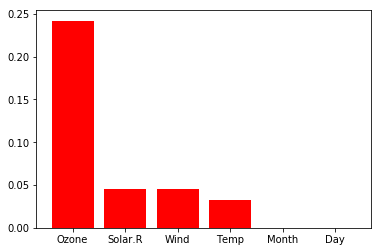

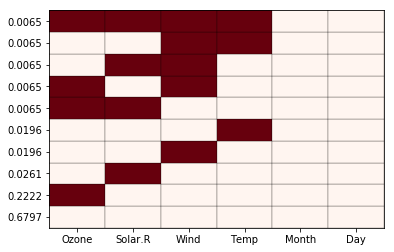

In [39]:
plt.figure(figsize = (12, 5))
fig1, ax1 = plt.subplots()
plt.bar(pat.columns[:-1][::-1], pat.loc[0].values[::-1][1::]/pat.index.values.sum(), color = 'r')

fig2, ax2 = plt.subplots()
plt.pcolor(pat[pat.columns[0:-1][::-1]].drop(0), edgecolors = 'black', cmap = 'Reds_r', snap = True)
ax2.set_xticks(np.arange(pat[pat.columns[0:-1][::-1]].drop(0).shape[1])+0.5, minor = False)
ax2.set_yticks(np.arange(pat[pat.columns[0:-1][::-1]].drop(0).shape[0])+0.5, minor = False)
ax2.set_xticklabels(pat.columns[0:-1][::-1].values)
ax2.set_yticklabels(np.round(pat.index.values/pat.index.values.sum(), 4))

## matrixplot，用熱圖的方式呈現。

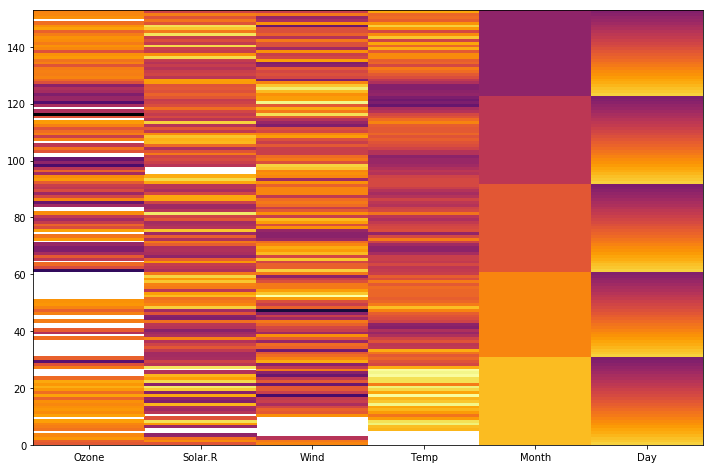

In [40]:
fig, ax = plt.subplots(figsize = (12, 8))
plt.pcolor((mydata-mydata.mean())/mydata.std(), cmap = 'inferno_r')
ax.set_xticks(np.arange(pat[pat.columns[0:-1][::-1]].drop(0).shape[1])+0.5, minor = False)
ax.set_xticklabels(pat.columns[0:-1][::-1].values)
plt.show()

## md.pairs，將彼此之間變數的缺失關係呈現。

In [41]:
def pairs(df):
    r = ~mydata.isnull()
    m = mydata.isnull()
    rr = dict()
    rm = dict()
    mr = dict()
    mm = dict()
    for i in df.columns:
        real = r.groupby(by = i)[r.columns].sum()
        miss = m.groupby(by = i)[m.columns].sum()
        if real.shape[0] < 2:
            tempR = real.T
            tempM = miss.T
            tempR[not(real.index.values)] = 0
            tempM[not(miss.index.values)] = 0
            real = tempR.T
            miss = tempM.T
        rr[i] = real.loc[True].values
        rm[i] = miss.loc[False].values
        mr[i] = real.loc[False].values
        mm[i] = miss.loc[True].values
    return (print('rr'), display(pd.DataFrame(rr)), print('rm'), display(pd.DataFrame(rm)), 
            print('mr'), display(pd.DataFrame(mr)), print('mm'), display(pd.DataFrame(mm)))

In [42]:
pairs(mydata)

rr


,Ozone,Solar.R,Wind,Temp,Month,Day
0,116.0,111.0,111.0,112.0,116.0,116.0
1,111.0,146.0,141.0,142.0,146.0,146.0
2,111.0,141.0,146.0,143.0,146.0,146.0
3,112.0,142.0,143.0,148.0,148.0,148.0
4,116.0,146.0,146.0,148.0,153.0,153.0
5,116.0,146.0,146.0,148.0,153.0,153.0


rm


,Ozone,Solar.R,Wind,Temp,Month,Day
0,0.0,35.0,35.0,36.0,37.0,37.0
1,5.0,0.0,5.0,6.0,7.0,7.0
2,5.0,5.0,0.0,5.0,7.0,7.0
3,4.0,4.0,3.0,0.0,5.0,5.0
4,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0


mr


,Ozone,Solar.R,Wind,Temp,Month,Day
0,0.0,5.0,5.0,4.0,0.0,0.0
1,35.0,0.0,5.0,4.0,0.0,0.0
2,35.0,5.0,0.0,3.0,0.0,0.0
3,36.0,6.0,5.0,0.0,0.0,0.0
4,37.0,7.0,7.0,5.0,0.0,0.0
5,37.0,7.0,7.0,5.0,0.0,0.0


mm


,Ozone,Solar.R,Wind,Temp,Month,Day
0,37.0,2.0,2.0,1.0,0.0,0.0
1,2.0,7.0,2.0,1.0,0.0,0.0
2,2.0,2.0,7.0,2.0,0.0,0.0
3,1.0,1.0,2.0,5.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0


(None, None, None, None, None, None, None, None)

## 兩變數的缺失關係呈現。

{'whiskers': [<matplotlib.lines.Line2D at 0x126876780>,
 'caps': [<matplotlib.lines.Line2D at 0x126876e10>,
 'boxes': [<matplotlib.lines.Line2D at 0x126876630>],
 'medians': [<matplotlib.lines.Line2D at 0x1268804e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x126880828>],
 'means': []}

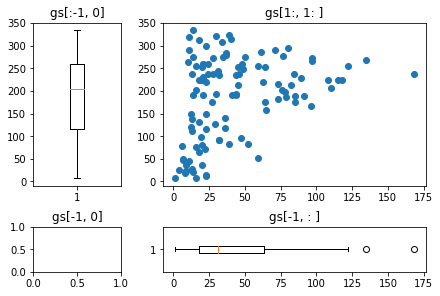

In [43]:
fig3 = plt.figure(constrained_layout = True)
gs = fig3.add_gridspec(3, 4)
f3_ax1 = fig3.add_subplot(gs[:-1, 0])
f3_ax1.set_title('gs[:-1, 0]')
f3_ax2 = fig3.add_subplot(gs[:-1, 1: ])
f3_ax2.set_title('gs[1:, 1: ]')
f3_ax3 = fig3.add_subplot(gs[-1, 1: ])
f3_ax3.set_title('gs[-1, : ]')
f3_ax4 = fig3.add_subplot(gs[-1, 0])
f3_ax4.set_title('gs[-1, 0]')
f3_ax2.scatter(x = mydata.Ozone, y = mydata['Solar.R'])
f3_ax3.boxplot(x = mydata.Ozone.dropna(), vert = False)  #水平的箱型圖
f3_ax1.boxplot(x = mydata['Solar.R'].dropna(), vert = True)


## List-wise Deletion

In [44]:
mdata = np.random.normal(size = 15).reshape(5, 3)

In [45]:
temp = mdata.flatten()
temp[np.random.choice(np.arange(15), 4)] = np.nan
mdata = temp.reshape(5, 3)

In [46]:
mdata = pd.DataFrame(mdata)

In [47]:
mdata

,0,1,2
0,0.737541,-0.441062,1.803508
1,-0.466722,0.381606,NaN
2,-1.548974,0.008304,1.061431
3,NaN,NaN,1.268145
4,1.035327,NaN,1.756661


In [48]:
mdata.dropna()

,0,1,2
0,0.737541,-0.441062,1.803508
2,-1.548974,0.008304,1.061431


In [49]:
mdata[mdata.isna().any(axis = 1)]

,0,1,2
1,-0.466722,0.381606,NaN
3,NaN,NaN,1.268145
4,1.035327,NaN,1.756661


## Pair-wise Deletion

In [50]:
mdata.cov()

,0,1,2
0,1.406092,-0.269031,0.579917
1,-0.269031,0.169678,-0.166732
2,0.579917,-0.166732,0.133684


## 平均數的補值方法

In [51]:
def mean_subst(x):
    x.fillna(np.mean(mdata))
    return x
mdata = mean_subst(mdata)

In [52]:
airquality.columns

Index(['Ozone', 'Solar.R', 'Wind', 'Temp', 'Month', 'Day'], dtype='object')

In [53]:
# Python Does not have an easy way to interpret kNN